Given an m x n integers matrix, return the length of the longest increasing path in matrix.

From each cell, you can either move in four directions: left, right, up, or down. You may not move diagonally or move outside the boundary (i.e., wrap-around is not allowed).

Example 1:

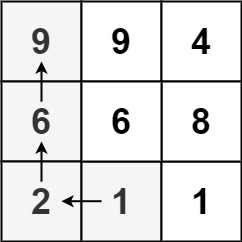

Input: matrix = [[9,9,4],[6,6,8],[2,1,1]]
Output: 4
Explanation: The longest increasing path is [1, 2, 6, 9].

Example 2:

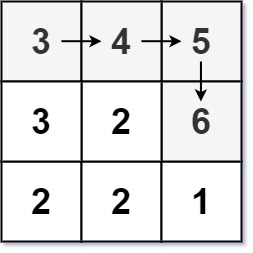

Input: matrix = [[3,4,5],[3,2,6],[2,2,1]]
Output: 4
Explanation: The longest increasing path is [3, 4, 5, 6]. Moving diagonally is not allowed.

Example 3:

Input: matrix = [[1]]
Output: 1

 

Constraints:

    m == matrix.length
    n == matrix[i].length
    1 <= m, n <= 200
    0 <= matrix[i][j] <= 231 - 1



In [32]:
from typing import List


class Solution:
    def longestIncreasingPath(self, matrix: List[List[int]]) -> int:
        max_steps = []
        matrix.insert(0, [0] * len(matrix[0]))
        matrix.append([0] * len(matrix[0]))
        target_len = len(matrix[0]) + 2
        for i in range(len(matrix)):
            max_steps.append([0] * target_len)
            matrix[i].insert(0, 0)
            matrix[i].append(0)

        def check_steps(x, y, matrix, memo):
            if (x < 0) or (x >= len(matrix)) or (y < 0) or (y >= len(matrix[0])):
                return 0
            if memo[x][y] == 0:
                max_steps = 1 + max([
                    check_steps(x - 1, y, matrix, memo) if matrix[x - 1][y] > matrix[x][y] else 0,
                    check_steps(x + 1, y, matrix, memo) if matrix[x + 1][y] > matrix[x][y] else 0,
                    check_steps(x, y - 1, matrix, memo) if matrix[x][y - 1] > matrix[x][y] else 0,
                    check_steps(x, y + 1, matrix, memo) if matrix[x][y + 1] > matrix[x][y] else 0,
                ])
                memo[x][y] = max_steps
            return memo[x][y]
        
        for i in range(1, len(matrix) - 1):
            for j in range(1, len(matrix[0]) - 1):
                check_steps(i, j, matrix, max_steps)
        
        return max([max(arr) for arr in max_steps])

In [33]:
s = Solution()
s.longestIncreasingPath(matrix=[[9,9,4],[6,6,8],[2,1,1]])

[[0, 0, 0, 0, 0], [0, 9, 9, 4, 0], [0, 6, 6, 8, 0], [0, 2, 1, 1, 0], [0, 0, 0, 0, 0]]
[[0, 0, 0, 0, 0], [0, 1, 1, 2, 0], [0, 2, 2, 1, 0], [0, 3, 4, 2, 0], [0, 0, 0, 0, 0]]


4